In [1]:
from scipy import ndimage
from skimage import filters
from skimage import util
import skimage.io as io
from skimage import exposure
from skimage import img_as_ubyte
from skimage import img_as_float

import matplotlib.pyplot as plt
import numpy as np

import os

In [116]:
def graficar2(image,image2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    ax = axes.ravel()
    
    ax[0].imshow(image) 
    ax[1].imshow(image2)
    fig.tight_layout()
    plt.show()

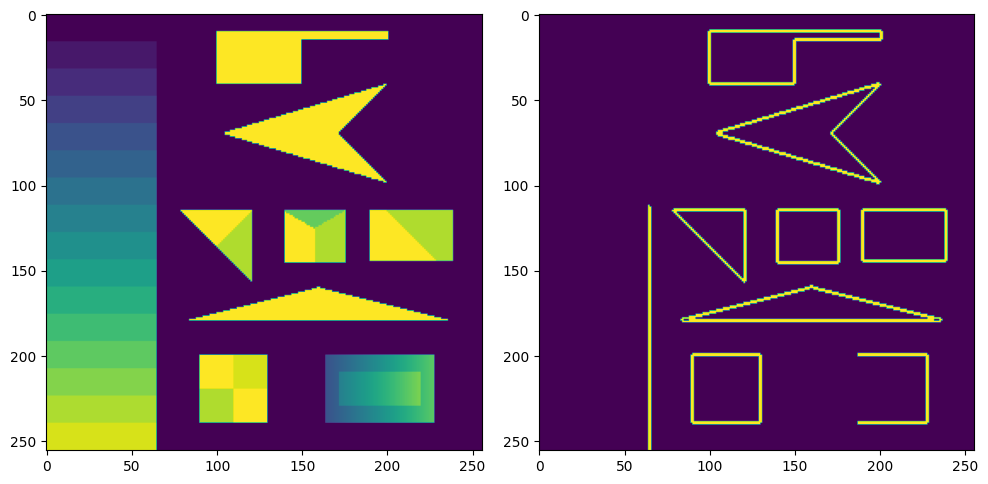

In [117]:
# roberts prewitt sobel 
dir_actual = os.getcwd()
imagenFilename = os.path.join(dir_actual,'Imagenes de pruebas','test.png')

image = io.imread(imagenFilename,as_gray=True)

image_border = filters.sobel(image) > 0.3

graficar2(image,image_border)

In [91]:
def hough_transform(img_bin, theta_shape = 400, rho_shape = 400 ,n=10):
    # definimos rango y division de theta y rho.
    fs, cs = img_bin.shape
    theta_values = np.deg2rad(np.linspace(-90, 90, theta_shape))
    diag_len = int(np.sqrt(fs**2 + cs**2))
    rho_values = np.linspace(-diag_len, diag_len, rho_shape)
    accumulator = np.zeros((len(rho_values), len(theta_values)), dtype=int)

    x_idxs, y_idxs = np.nonzero(img_bin)
    
    # Transformada de Hough.
    for i in range(len(x_idxs)): 
        x = x_idxs[i]
        y = y_idxs[i]
        for theta_index in range(theta_shape):
            theta = theta_values[theta_index]
            rho = x * np.cos(theta) + y * np.sin(theta)
            # Encontrar el índice de rho en la matriz acumuladora
            rho_index = np.argmin(np.abs(rho_values - rho))
            # Incrementar el valor en la matriz acumuladora
            accumulator[rho_index, theta_index] += 1
    
    # Encontrar el índice del valor máximo en la matriz acumuladora
    max_index_s = np.unravel_index(np.argpartition(accumulator.flatten(),-n)[-n:], accumulator.shape)
    index_s = list(zip(max_index_s[0],max_index_s[1]))
    
    lineas = []
    for o in index_s: 
        max_rho_index, max_theta_index = o
        rho_detected = rho_values[max_rho_index]
        theta_detected = theta_values[max_theta_index]
        lineas.append((rho_detected,theta_detected))
    
    return lineas

In [86]:
# Función auxiliar para trazar líneas pixel por pixel
def line_pixels(shape, start, end):
    from skimage.draw import line
    rr, cc = line(start[1], start[0], end[1], end[0])
    rr = np.clip(rr, 0, shape[0] - 1)
    cc = np.clip(cc, 0, shape[1] - 1)
    return rr, cc
    
def dibujar_lineas(img_bin, lineas):
    img_con_lineas = np.copy(img_bin)
    for rho, theta in lineas:
        # Calcula puntos para dibujar la línea en la imagen
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        # Dibuja la línea en la imagen (ajusta si usas OpenCV)
        rr, cc = line_pixels(img_con_lineas.shape, (x1, y1), (x2, y2))
        img_con_lineas[rr, cc] = 1  # Dibujar en blanco

    return img_con_lineas

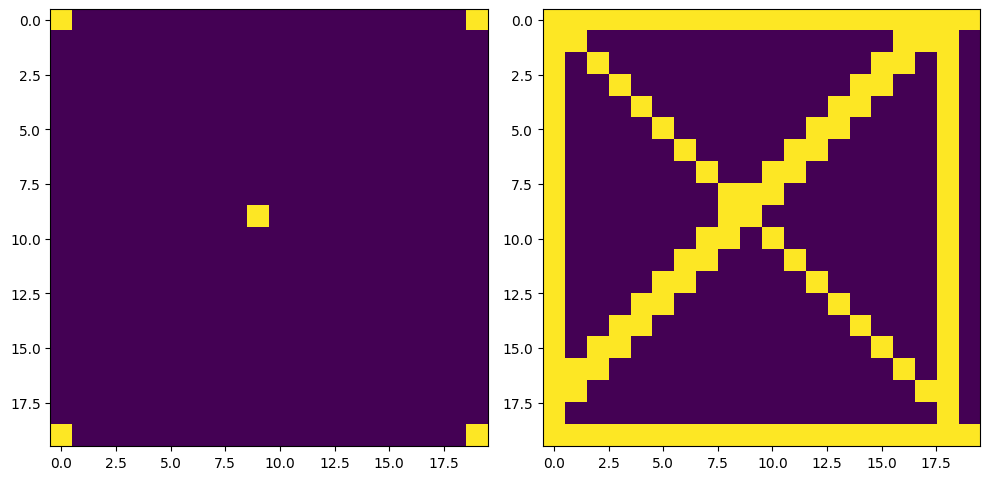

In [118]:
img = np.zeros((20,20),dtype=int)
for (x,y) in E: 
    img[x,y] = 1
lineas = hough_transform(img,n=9)
img_lineas = dibujar_lineas(img,lineas)
graficar2(img,img_lineas)

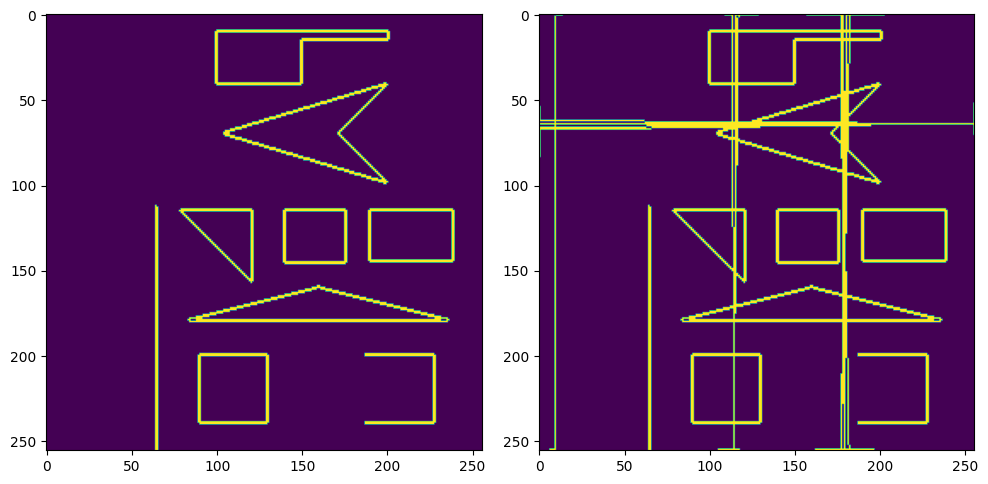

In [121]:
lineas = hough_transform(image_border,n=15)
img2 = dibujar_lineas(image_border,lineas)
graficar2(image_border,img2)